# Importing required libraries

In [1]:
from dateutil.parser import parse 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as sp

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Importing the dataset

In [2]:
# Fetching the data
data = pd.read_csv('Cali Emissions.csv')
data.head()

,Unnamed: 0,"Total carbon dioxide emissions from all sectors, all fuels, California (million metric tons CO2)"
0,1980,346.183721
1,1981,334.381538
2,1982,298.004398
3,1983,293.436371
4,1984,315.858105


# EDA and Preprocessing the Data

In [3]:
# Changing column names
data.columns = ['Year','Emission']
data.tail()
# Data is from Jan 1980 to Dec 2017
# We have 37 years data

,Year,Emission
33,2013,354.219000
34,2014,351.477053
35,2015,359.290429
36,2016,359.261859
37,2017,360.913489


In [4]:
# Checking data types of the columns as date format is different
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      38 non-null     int64  
 1   Emission  38 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 736.0 bytes


In [36]:
data.describe()

,Emission
count,38.000000
mean,352.023971
std,23.771412
min,293.436371
25%,343.015890
50%,354.561949
75%,364.876946
max,395.340927


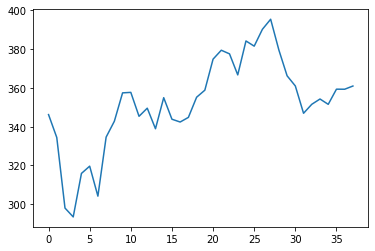

In [5]:
plt.plot(data['Emission'])
#plt.plot(data['Price'].ewm(span=15).mean())

In [6]:
# Setting the Date column as the index
data = data.set_index('Year')
data

,Emission
Year,
1980,346.183721
1981,334.381538
1982,298.004398
1983,293.436371
1984,315.858105
1985,319.602879
1986,304.143786
1987,334.571460
1988,342.754725


# Splitting the Data into train and test

In [7]:
train = data.iloc[:int(0.7*len(data))-1,:]
test = data.iloc[int(0.7*len(data))-1:,:]

In [8]:
train

,Emission
Year,
1980,346.183721
1981,334.381538
1982,298.004398
1983,293.436371
1984,315.858105
1985,319.602879
1986,304.143786
1987,334.571460
1988,342.754725


In [9]:
test

,Emission
Year,
2005,381.471792
2006,390.164017
2007,395.340927
2008,379.480916
2009,366.184902
2010,360.953079
2011,346.864178
2012,351.496006
2013,354.219000


# Checking the trend and seasonal decompose of the train data

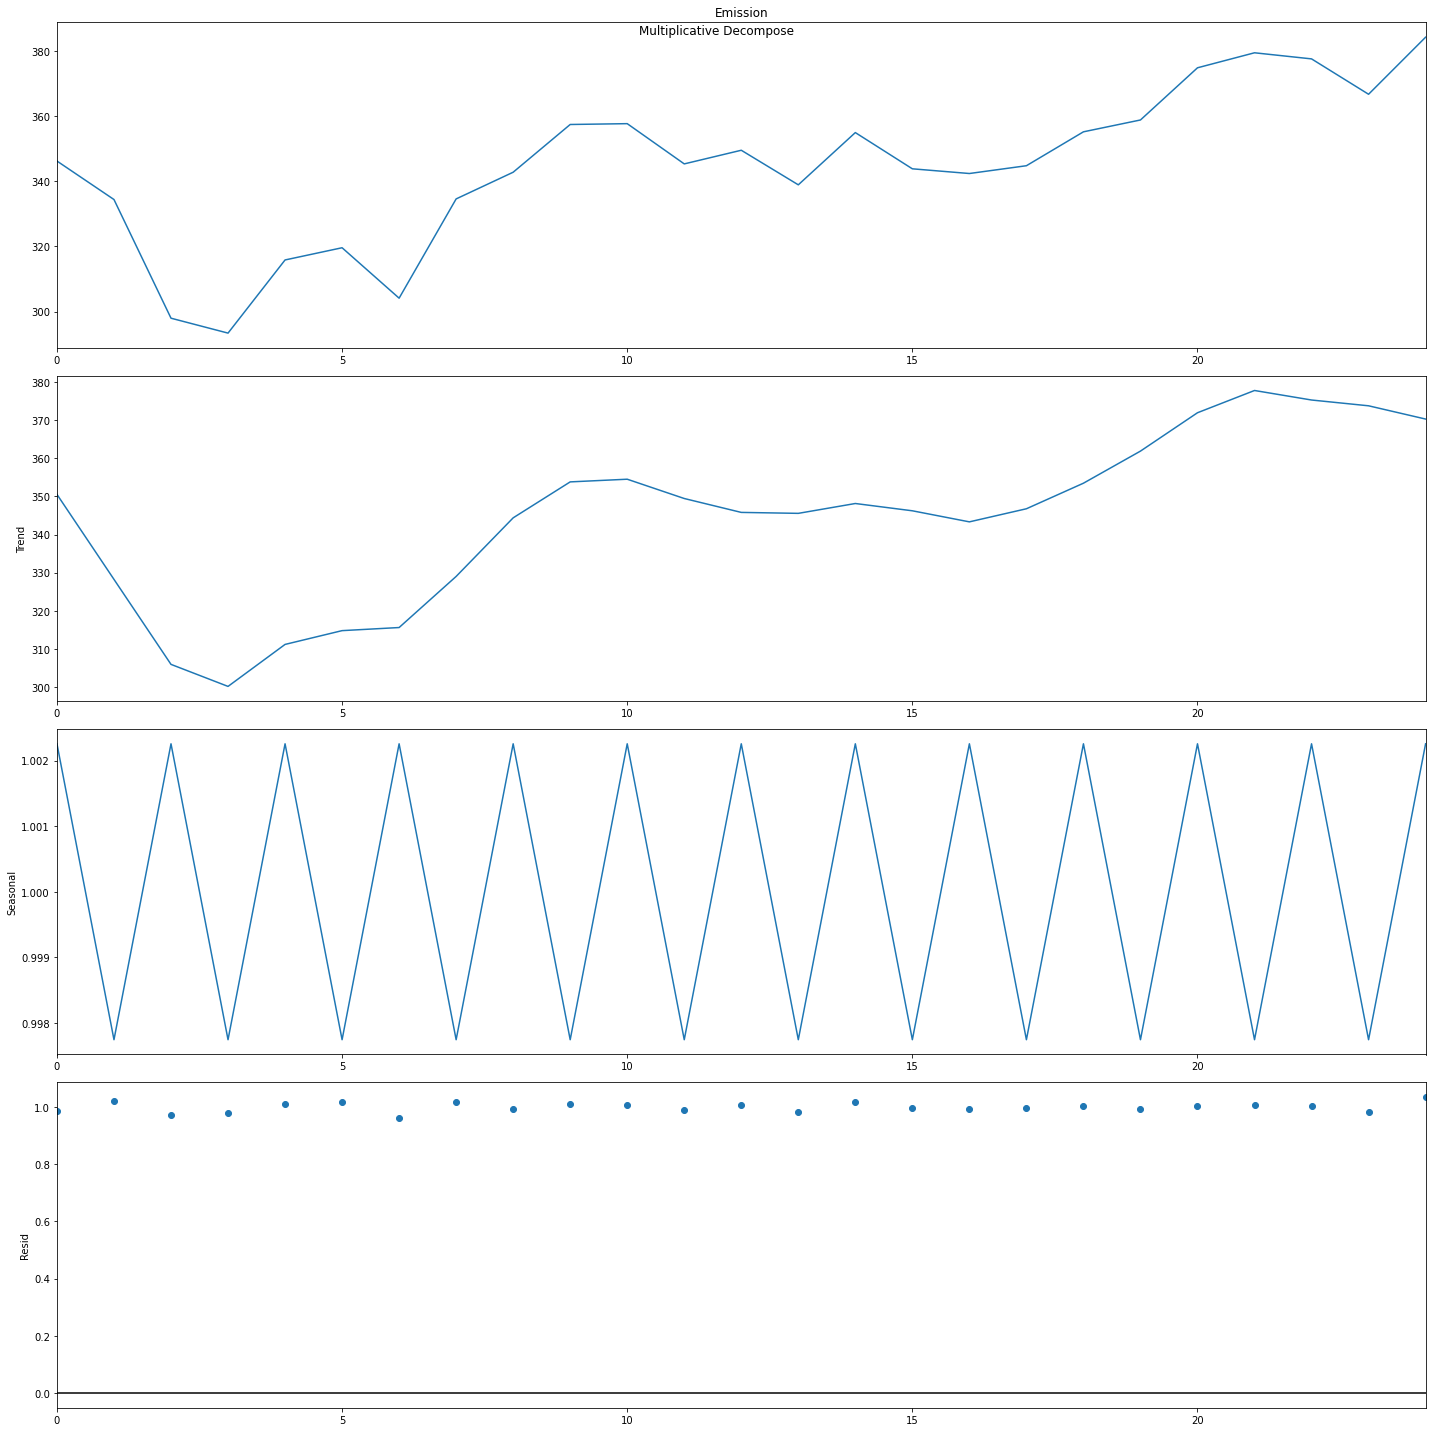

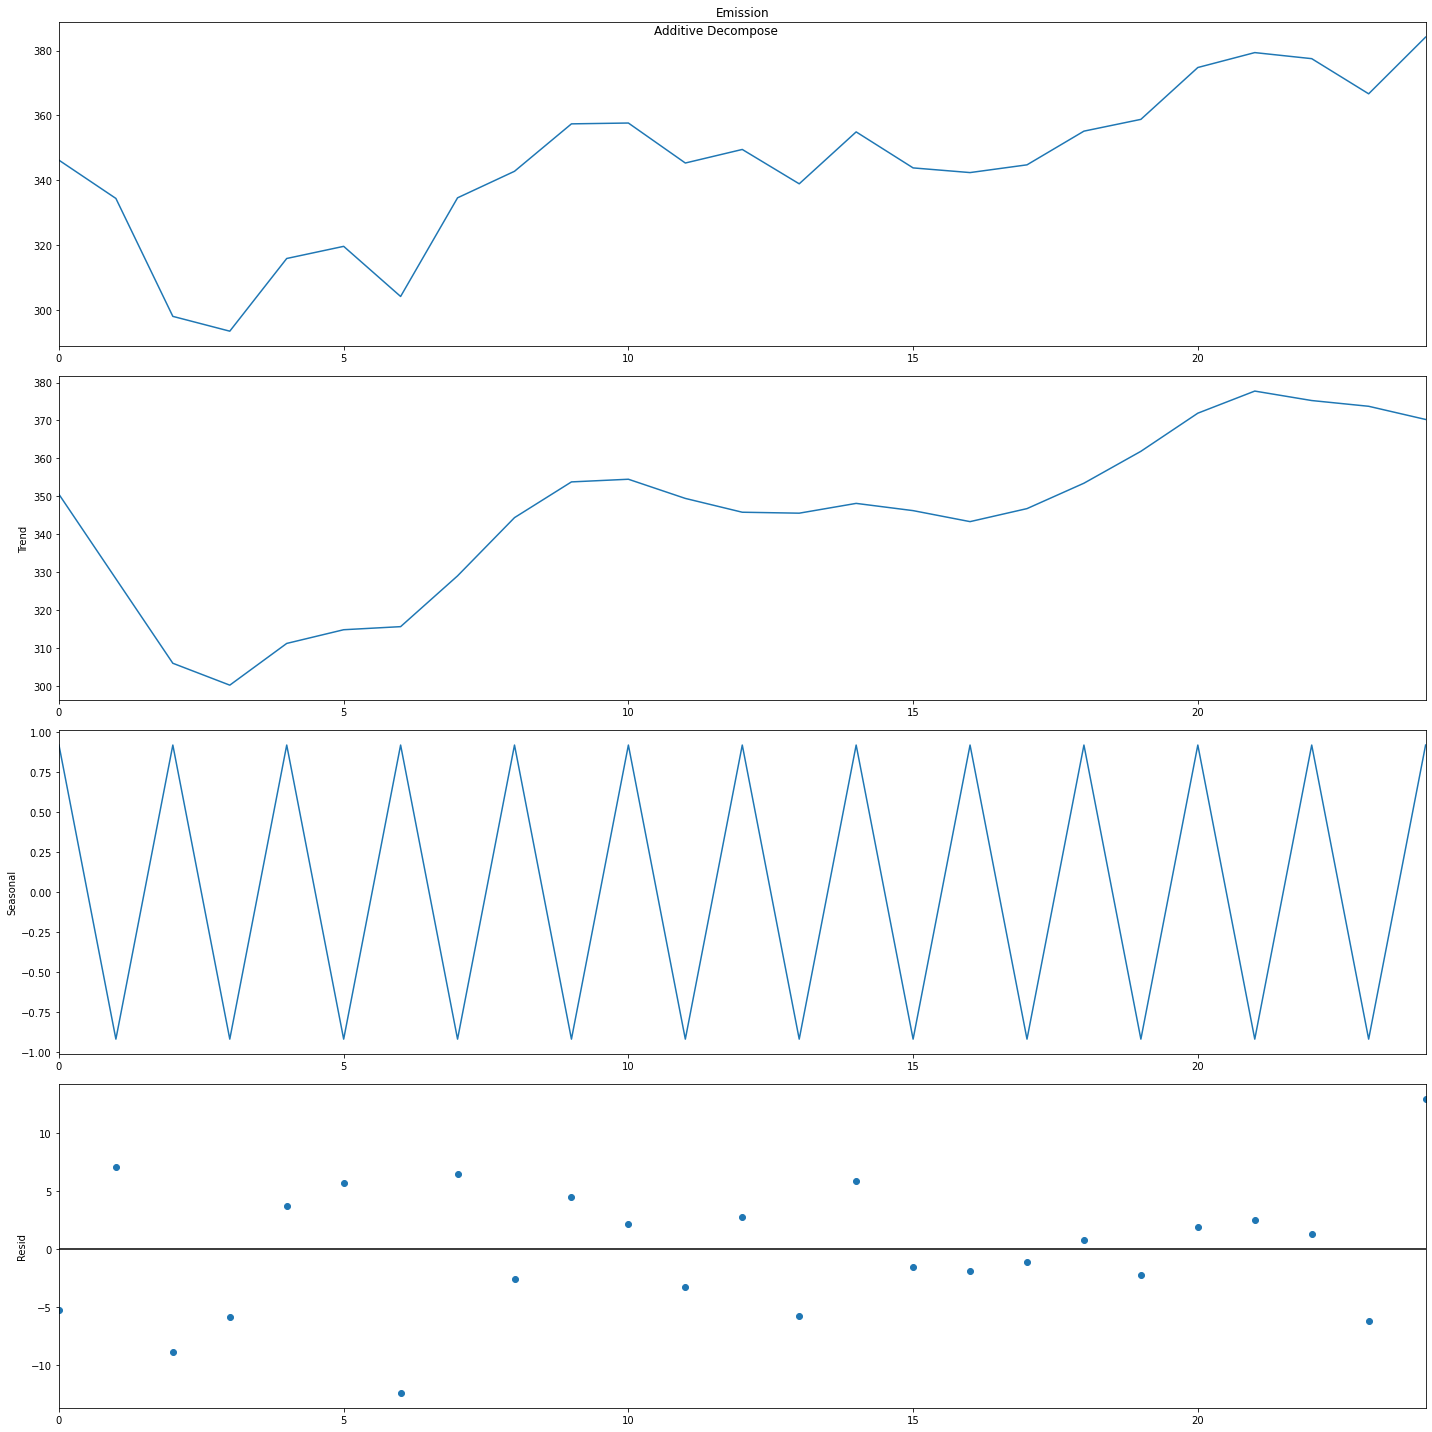

In [10]:
# Additive and multiplicative time series
# Decomposing data into additive and multiplicative components

train = train.reset_index()

# Multiplicative Decomposition 
result_mul = seasonal_decompose(train['Emission'], period = 2, model='multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(train['Emission'], period = 2, model='additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

# Since the residuals are random in the additive decompose, we can say that the data
# follows a additive decompose and contains both a bi-yearly seasonal and trend element

In [11]:
# Multiplicative components
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed['addition'] = df_reconstructed['seas']+df_reconstructed['trend']+df_reconstructed['resid']
df_reconstructed.head()

,seas,trend,resid,actual_values,addition
0,0.919285,350.518921,-5.254486,346.183721,346.183721
1,-0.919285,328.237799,7.063025,334.381538,334.381538
2,0.919285,305.956676,-8.871564,298.004398,298.004398
3,-0.919285,300.183811,-5.828155,293.436371,293.436371
4,0.919285,311.188865,3.749955,315.858105,315.858105


# ADF and KPSS Test

In [12]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(train.Emission.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence accept null hypothesis, data is not stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(train.Emission.values, regression='ct') # Since data is stationary around a trend, we use ct instead of c
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence reject null hypothesis, data is not stationary

ADF Statistic: -1.0023308523917096
p-value: 0.7524132272784647
Critial Values:
   1%, -3.7377092158564813
Critial Values:
   5%, -2.9922162731481485
Critial Values:
   10%, -2.635746736111111

KPSS Statistic: 0.263720
p-value: 0.010000
Critial Values:
   10%, 0.119
Critial Values:
   5%, 0.146
Critial Values:
   2.5%, 0.176
Critial Values:
   1%, 0.216


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# De-trending the data

**Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.**  
  
- Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.  
- Subtract the trend component obtained from time series decomposition we saw earlier.  
  
- Subtract the mean  
  
- Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

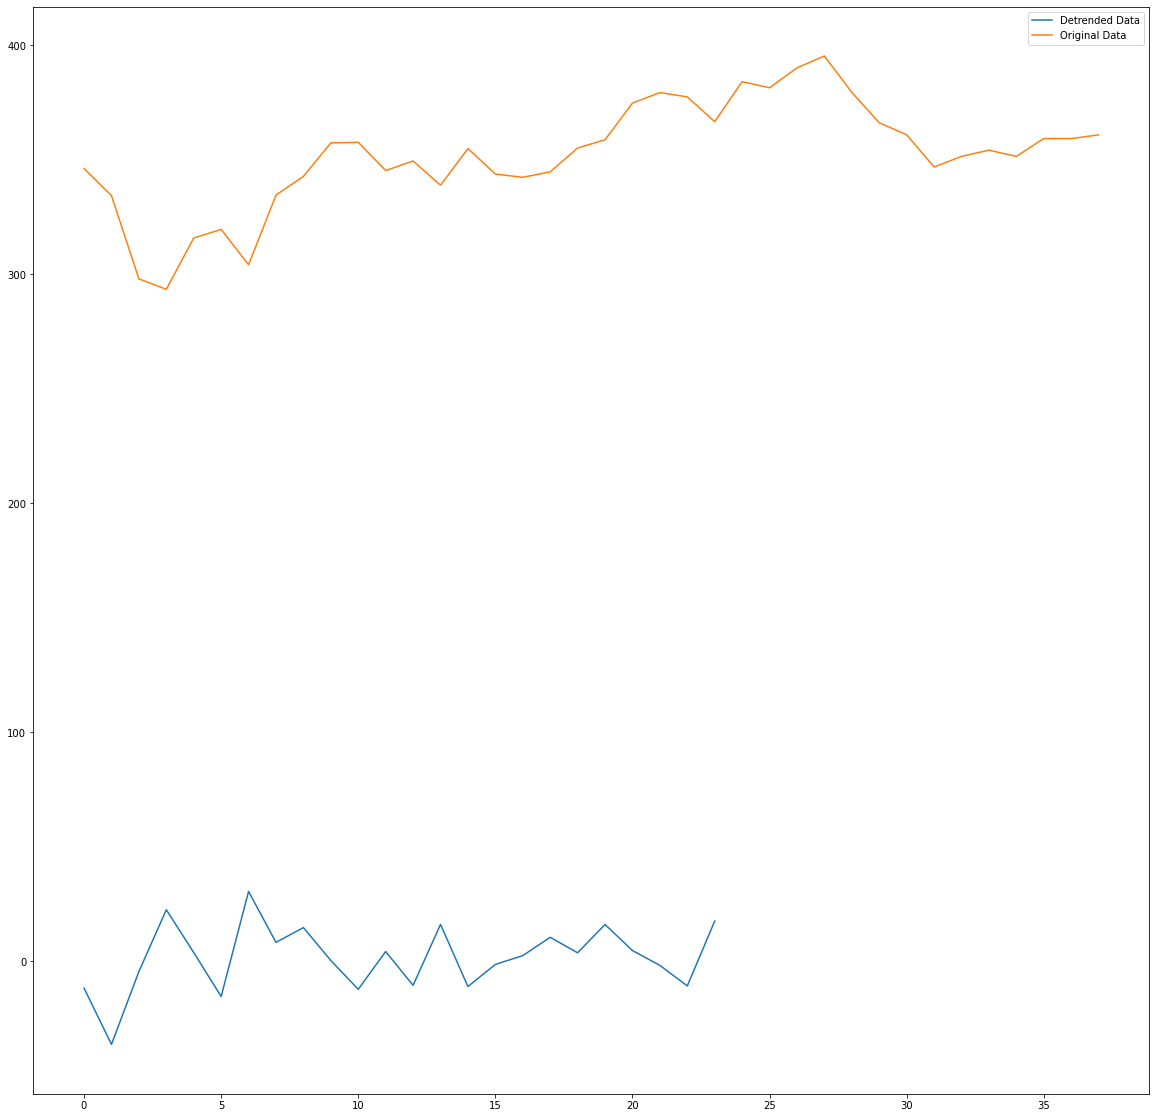

In [13]:
# Given data follows a stochastic trend that is increase and decrease in values does not follow a consistent pattern

# Detrending using difference method
#create a differenced series
def difference(dataset,interval=1):
    diff=list()
    for i in range(interval,len(dataset)):
        value=dataset[i]-dataset[i-interval]
        diff.append(value)
    return (diff)

df_detrend=difference(train['Emission'])

plt.plot(df_detrend,label = 'Detrended Data')
plt.plot(data.Emission.values,label='Original Data')
plt.legend()

In [14]:
# Testing for stationarity on detrended data
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(df_detrend, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence accept null hypothesis, data is stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(df_detrend, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence reject null hypothesis, data is stationary

ADF Statistic: -4.585136276950708
p-value: 0.00013756791952921208
Critial Values:
   1%, -3.7529275211638033
Critial Values:
   5%, -2.998499866852963
Critial Values:
   10%, -2.6389669754253307

KPSS Statistic: 0.357420
p-value: 0.095509
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


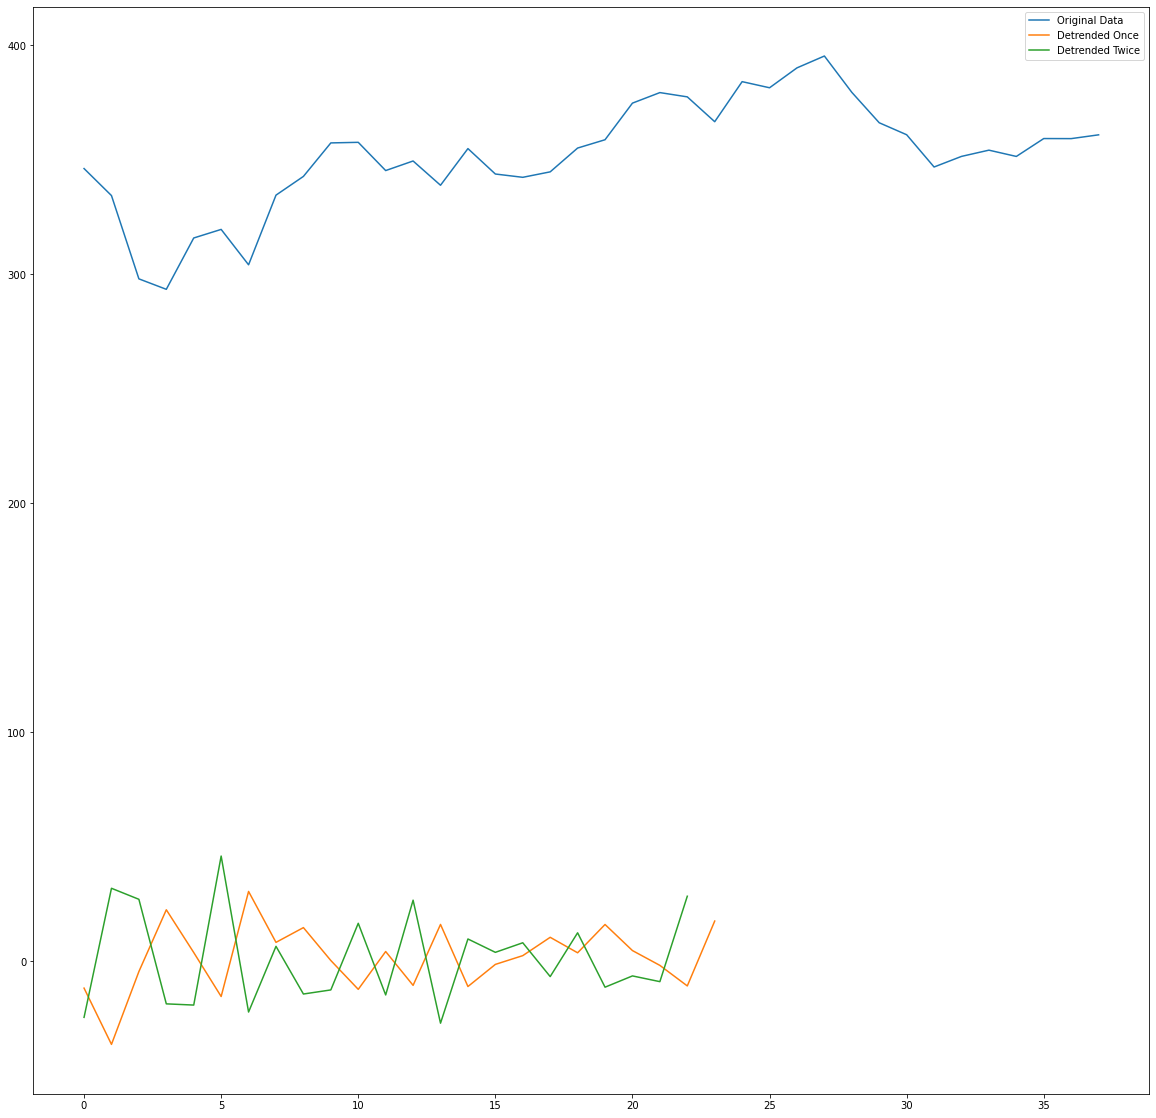

In [15]:
# De-trending the data second time

df_detrend2=difference(df_detrend,1)

plt.plot(data.Emission.values,label='Original Data')
plt.plot(df_detrend, label = 'Detrended Once')
plt.plot(df_detrend2, label = 'Detrended Twice')
plt.legend()

In [16]:
# Testing for stationarity on detrended data
from statsmodels.tsa.stattools import adfuller, kpss

# H0: Not stationary
# Ha: Stationary
# ADF Test
result = adfuller(df_detrend2, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value<0.05, hence accept null hypothesis, data is stationary

# H0: Stationary
# Ha: Not Stationary
# KPSS Test - Trend Stationarity
result = kpss(df_detrend2, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# p value>0.05, hence reject null hypothesis, data is stationary

ADF Statistic: -7.5633246117283885
p-value: 2.9702307280048386e-11
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373

KPSS Statistic: 0.228834
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# ACF and PACF Plots

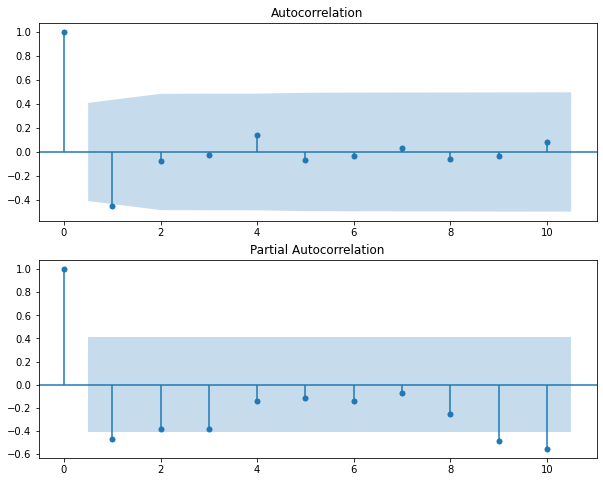

In [17]:
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df_detrend2,lags=10,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df_detrend2,lags=10,ax=ax2)

# ACF is gradual and PACF is sudden. Hence it is MA(q) model with q = 1 from ACF plot

# Auto ARIMA

In [18]:
import pmdarima as pm

In [19]:
myfit = pm.auto_arima(train['Emission'], m=0,seasonal=False,trace=True, start_p = 0, start_q = 0, d=2,
                      error_action='ignore', # don't want to know if an order does not work
                      suppress_warnings=True, # don't want convergence warnings
                      stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=207.551, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=203.632, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=205.642, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=202.606, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=201.736, Time=0.15 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=203.614, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=200.126, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=200.981, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=202.020, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=202.047, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 A

# ARIMA

In [20]:
#model=sm.tsa.arima.ARIMA(train['Emission'],order=(0,2,1)) # Using ACF and PACF Plots
model=sm.tsa.arima.ARIMA(train['Emission'],order=(3,2,0)) # Using Auto ARIMA Params

model_res=model.fit()

print(model_res.summary())

                               SARIMAX Results                                
Dep. Variable:               Emission   No. Observations:                   25
Model:                 ARIMA(3, 2, 0)   Log Likelihood                 -96.063
Date:                Wed, 04 May 2022   AIC                            200.126
Time:                        12:35:50   BIC                            204.668
Sample:                             0   HQIC                           201.269
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7709      0.215     -3.589      0.000      -1.192      -0.350
ar.L2         -0.6601      0.242     -2.733      0.006      -1.133      -0.187
ar.L3         -0.4119      0.264     -1.561      0.1

In [21]:
tspredict= model_res.predict(20)

tsforecast=model_res.forecast(13)

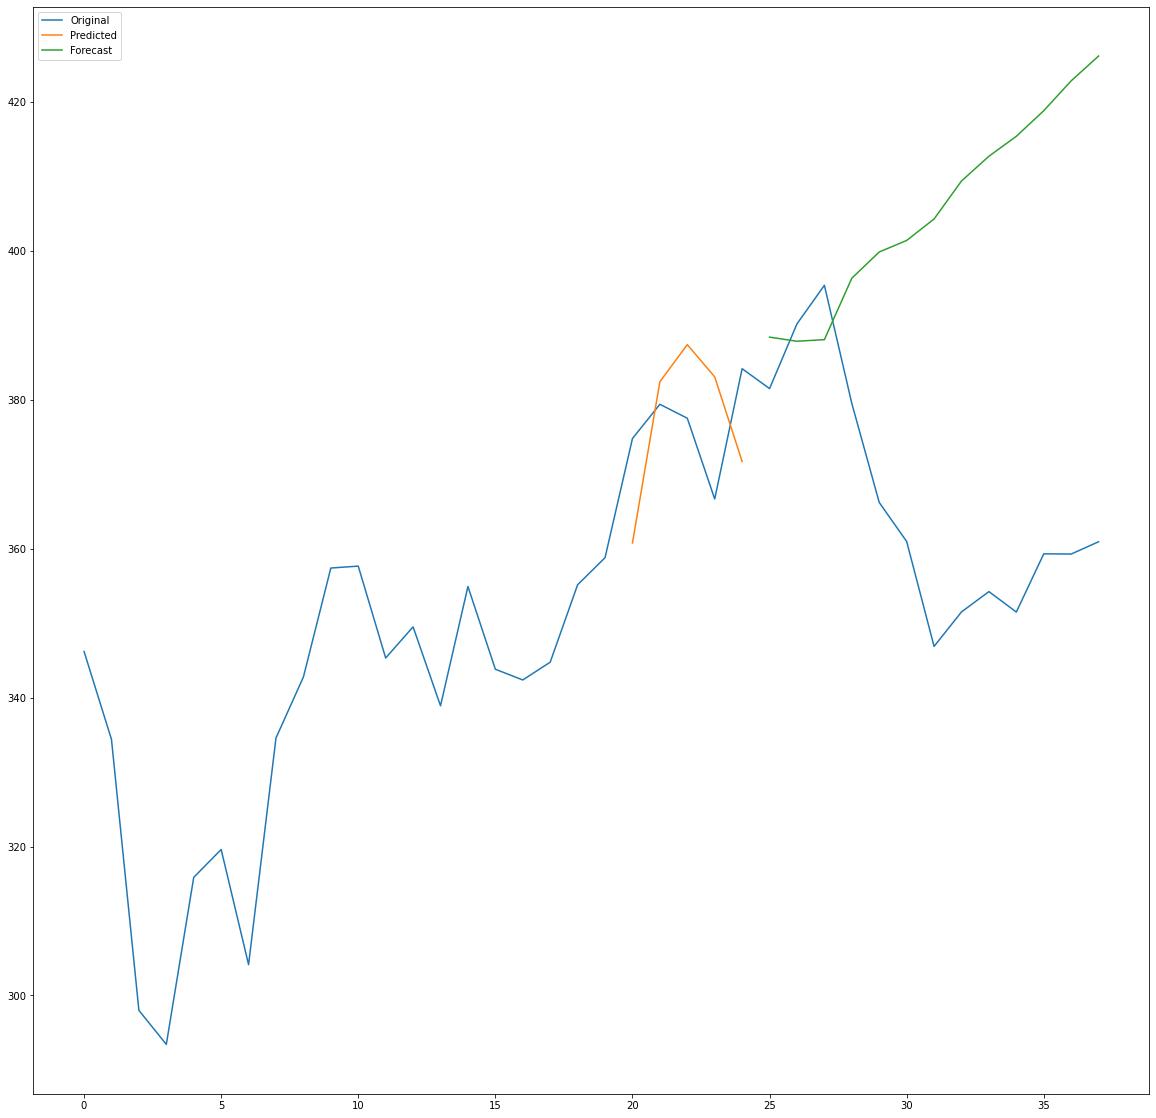

In [22]:
plt.plot(data['Emission'].values, label='Original')
plt.plot(tspredict, label='Predicted')
plt.plot(tsforecast, label='Forecast')
plt.legend()

In [23]:
rmse = mean_squared_error(test, model_res.forecast(13), squared=False)
rmse

47.32278008413997

# Holt

In [24]:
from statsmodels.tsa.holtwinters import Holt

In [25]:
model = Holt(train['Emission'])
result = model.fit()

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
result.params

{'smoothing_level': 0.9836841693000944,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 344.37435601826667,
 'initial_trend': 1.5805301750739007,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [27]:
print(result.summary())

                              Holt Model Results                              
Dep. Variable:               Emission   No. Observations:                   25
Model:                           Holt   SSE                           4880.067
Optimized:                       True   AIC                            139.851
Trend:                       Additive   BIC                            144.726
Seasonal:                        None   AICC                           144.518
Seasonal Periods:                None   Date:                 Wed, 04 May 2022
Box-Cox:                        False   Time:                         12:35:51
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9836842                alpha                 True
smoothing_trend             0.000000                

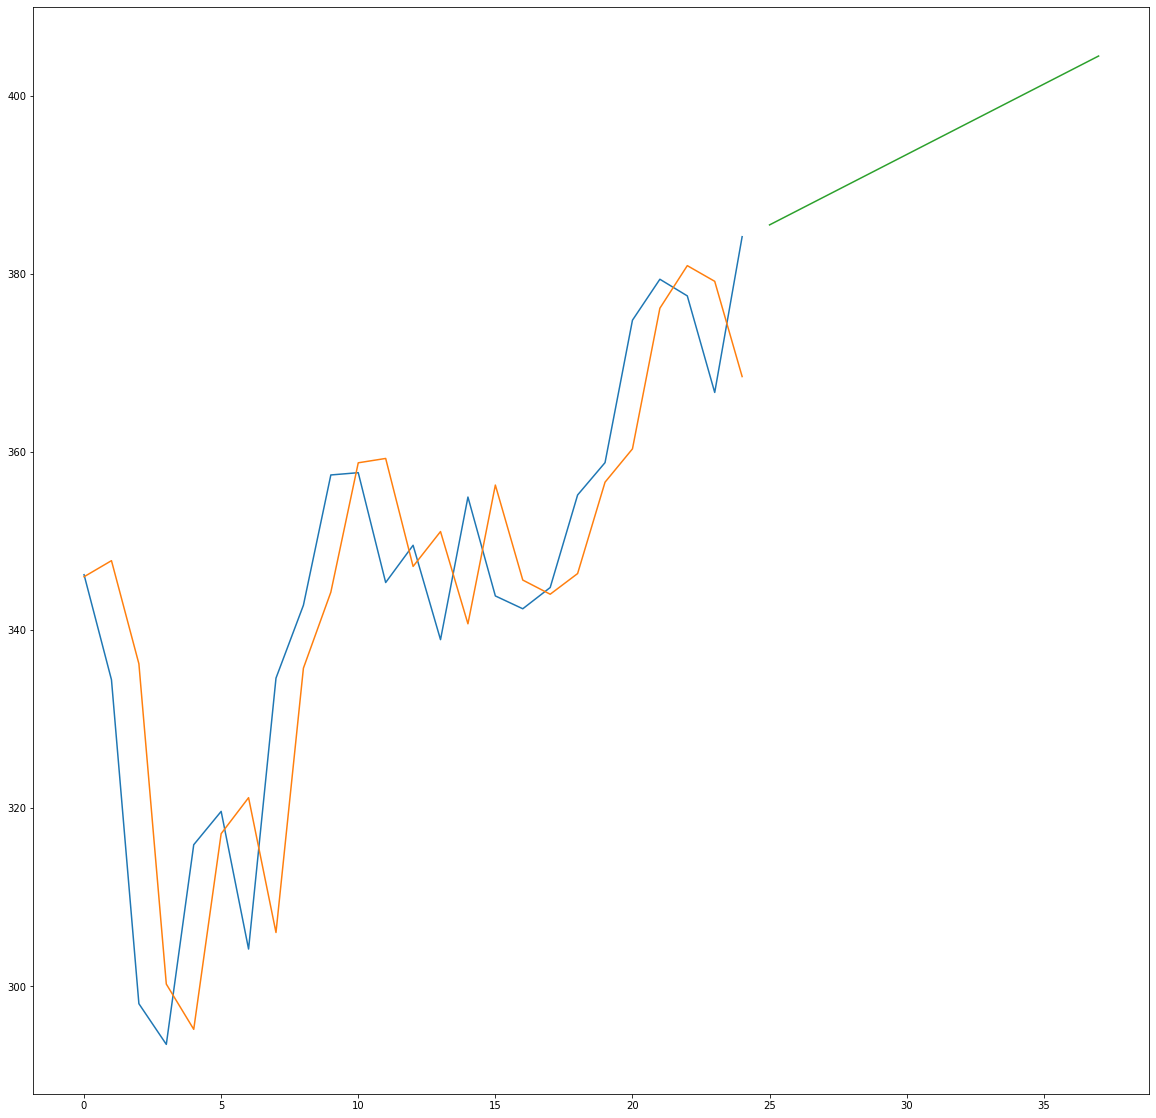

In [28]:
plt.plot(train['Emission'])
plt.plot(result.fittedvalues)
plt.plot(result.forecast(13))

In [29]:
rmse = mean_squared_error(test, result.forecast(13), squared=False)
rmse

35.12855805356768

# Exponential Smoothing

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
model = ExponentialSmoothing(train['Emission'], trend='additive', seasonal_periods = 1)

C:\Users\Amisha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [32]:
result3 = model.fit()
result3.params

{'smoothing_level': 0.9836841693000944,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 344.37435601826667,
 'initial_trend': 1.5805301750739007,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
print(result3.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Emission   No. Observations:                   25
Model:             ExponentialSmoothing   SSE                           4880.067
Optimized:                         True   AIC                            139.851
Trend:                         Additive   BIC                            144.726
Seasonal:                          None   AICC                           144.518
Seasonal Periods:                  None   Date:                 Wed, 04 May 2022
Box-Cox:                          False   Time:                         12:35:51
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9836842                alpha                 True
smoothing_trend             0.0000

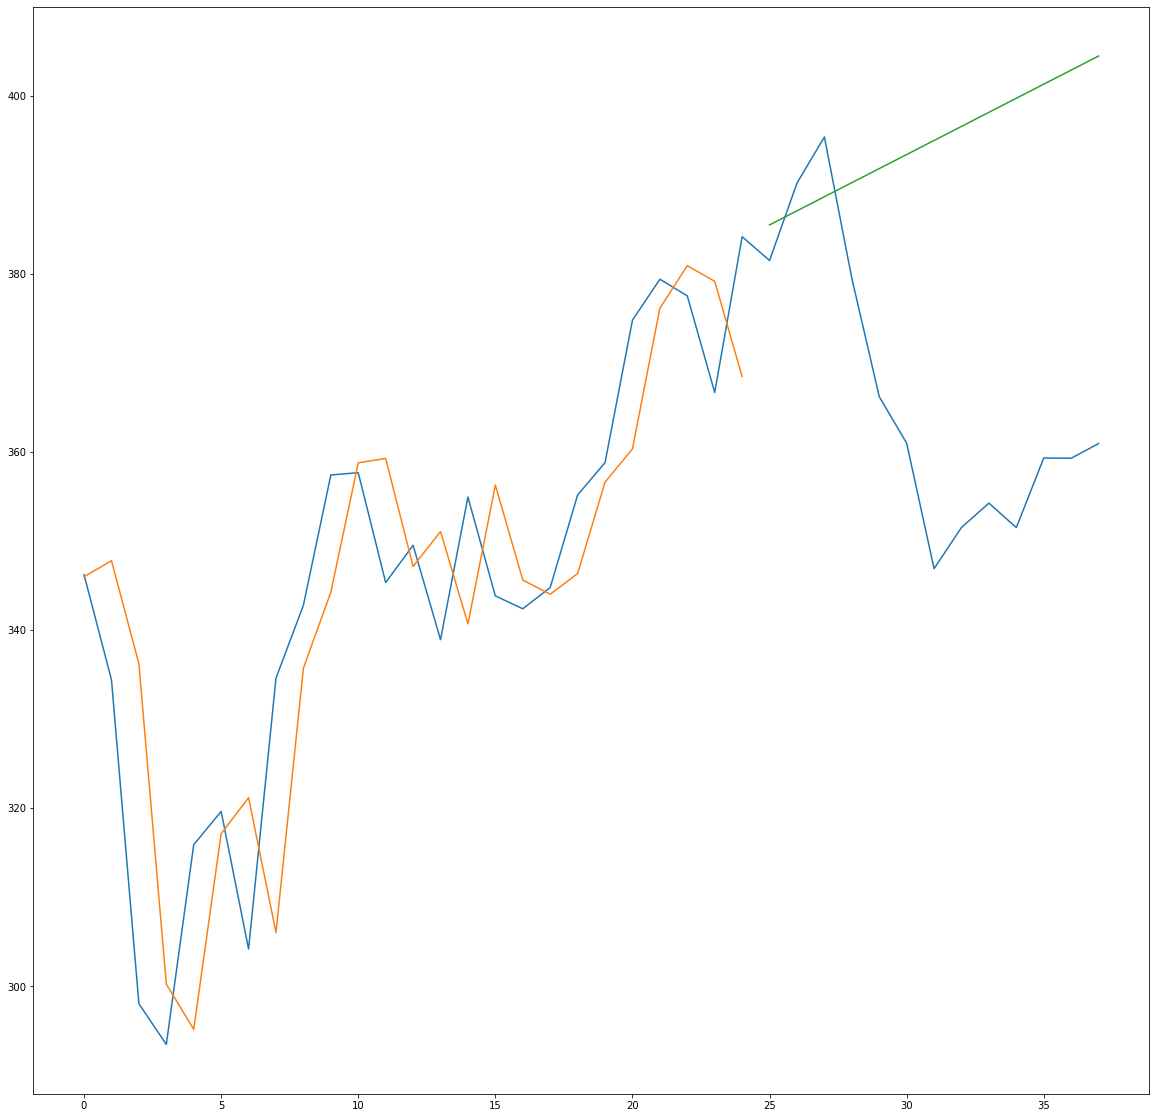

In [34]:
plt.plot(data['Emission'].values)
plt.plot(result3.fittedvalues)
plt.plot(result3.forecast(13))

In [35]:
rmse = mean_squared_error(test, result3.forecast(13), squared=False)
rmse

35.12855805356768